In [1]:
import scvi
import scanpy as sc
import anndata
import numpy as np
import pandas as pd
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy.sparse as sp

scvi.settings.seed = 0

Seed set to 0


In [2]:
import os

# Define the path to the directory you want to change to
new_directory = '/scratch365/eaboelno/cVAE_analysis/sysVI/'

# Use os.chdir() to change the working directory
os.chdir(new_directory)

In [4]:
adata = sc.read_h5ad('./adata_all_mergedHVG_CAPS.h5ad')
adata

AnnData object with n_obs × n_vars = 433583 × 2904
    obs: 'sample_id', 'publication', 'sample_id_anon', 'individual_id_anon', 'replicate', 'treatment', 'condition', 'tissue', 'time', 'batch', 'lesion_type', 'sample_source', 'diagnosis', 'n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo', 's_score', 'g2m_score', 'phase', 'type_fine', 'type_broad', 'cluster_zoom', 'exclude_pseudobulk', 'seq_pool', 'sex', 'age_at_death', 'smoker', 'cause_of_death', 'years_w_ms', 'pmi_minutes', 'age_scale', 'age_cat', 'pmi_cat', 'pmi_cat2', 'cell_cycle_diff', 'cell_type_eval', 'library_type', 'sample_type', 'organism', 'system', 'n_counts'
    var: 'human_gene_id', 'mouse_gene_id', 'mouse_gene_name', 'human_gene_name'
    layers: 'counts', 'log1p_norm'

In [5]:
columns_to_drop = ['system', 'n_counts']
adata.obs.drop(columns=columns_to_drop, inplace=True)

In [6]:
mapping = {'(this study)': 0, 'Pandey et al. 2022': 1, 'Shen et al. 2021': 1, 'Macnair et al. biorxiv': 2}

# Map the values in 'mm_study' column to create the new 'sysvi' column
adata.obs["system"] = adata.obs["publication"].map(mapping)
adata.obs

,sample_id,publication,sample_id_anon,individual_id_anon,replicate,treatment,condition,tissue,time,batch,...,age_scale,age_cat,pmi_cat,pmi_cat2,cell_cycle_diff,cell_type_eval,library_type,sample_type,organism,system
GTATTTCGTCCACATA-1_adams_mouse,cl2,(this study),adams_Sample6_2,adams_Sample6,2,LPC,Demyelination,Corpus callosum,7dpl,6,...,0,adult,None,None,-0.039946,excitatory neurons,10X 3p kit v3.1,sn,mouse,0
ATACCTTGTCGACGCT-1_adams_mouse,cl2,(this study),adams_Sample6_2,adams_Sample6,2,LPC,Demyelination,Corpus callosum,7dpl,6,...,0,adult,None,None,-0.030285,inhibitory neurons,10X 3p kit v3.1,sn,mouse,0
TCAAGACGTGCTGCAC-1_adams_mouse,cl2,(this study),adams_Sample6_2,adams_Sample6,2,LPC,Demyelination,Corpus callosum,7dpl,6,...,0,adult,None,None,0.002119,excitatory neurons,10X 3p kit v3.1,sn,mouse,0
AGTACTGTCAAGTAAG-1_adams_mouse,cl2,(this study),adams_Sample6_2,adams_Sample6,2,LPC,Demyelination,Corpus callosum,7dpl,6,...,0,adult,None,None,0.039672,excitatory neurons,10X 3p kit v3.1,sn,mouse,0
TCCCAGTTCCGATGCG-1_adams_mouse,cl2,(this study),adams_Sample6_2,adams_Sample6,2,LPC,Demyelination,Corpus callosum,7dpl,6,...,0,adult,None,None,-0.016213,inhibitory neurons,10X 3p kit v3.1,sn,mouse,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ind102-Sample4:TTTGTTGAGCGACTGA-1_macnair,Human_MS,Macnair et al. biorxiv,Ind102-Sample4,Ind102,1,MS_patient,MS,White matter,64 years,122,...,0.301502181578831,inbetween,6H_to_12H,up_to_12H,0.059753,oligodendrocytes,10X 3p kit v3.3,sn,human,2
Ind102-Sample4:TTTGTTGAGTAGCTCT-1_macnair,Human_MS,Macnair et al. biorxiv,Ind102-Sample4,Ind102,1,MS_patient,MS,White matter,64 years,122,...,0.301502181578831,inbetween,6H_to_12H,up_to_12H,0.037903,microglia,10X 3p kit v3.3,sn,human,2
Ind102-Sample4:TTTGTTGCAGACGATG-1_macnair,Human_MS,Macnair et al. biorxiv,Ind102-Sample4,Ind102,1,MS_patient,MS,White matter,64 years,122,...,0.301502181578831,inbetween,6H_to_12H,up_to_12H,-0.052304,microglia,10X 3p kit v3.3,sn,human,2
Ind102-Sample4:TTTGTTGCATACAGAA-1_macnair,Human_MS,Macnair et al. biorxiv,Ind102-Sample4,Ind102,1,MS_patient,MS,White matter,64 years,122,...,0.301502181578831,inbetween,6H_to_12H,up_to_12H,-0.023288,oligodendrocytes,10X 3p kit v3.3,sn,human,2


In [7]:
system_counts = adata.obs['system'].value_counts()

# Create a DataFrame to display the counts
system_counts_df = pd.DataFrame({'system': system_counts.index, 'Count': system_counts.values})
system_counts_df

,system,Count
0,2,321566
1,1,90634
2,0,21383


In [8]:
counts_by_publication_system = adata.obs.groupby('publication')['system'].value_counts()
counts_by_publication_system

/tmp/140611.1.gpu-long/ipykernel_719669/3886540734.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_by_publication_system = adata.obs.groupby('publication')['system'].value_counts()


publication             system
(this study)            0          21383
                        1              0
                        2              0
Macnair et al. biorxiv  2         321566
                        0              0
                        1              0
Pandey et al. 2022      1          41938
                        0              0
                        2              0
Shen et al. 2021        1          48696
                        0              0
                        2              0
Name: count, dtype: int64

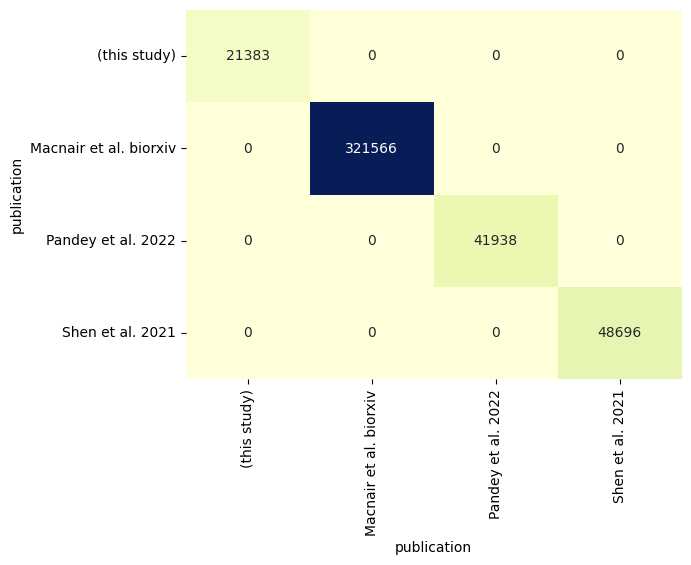

In [10]:
crosstab_df = pd.crosstab(adata.obs.publication, adata.obs.publication)

# Create the heatmap with integer annotations
sns.heatmap(crosstab_df, cmap="YlGnBu", annot=True, fmt="d", cbar=False)

# Show the heatmap
plt.show()

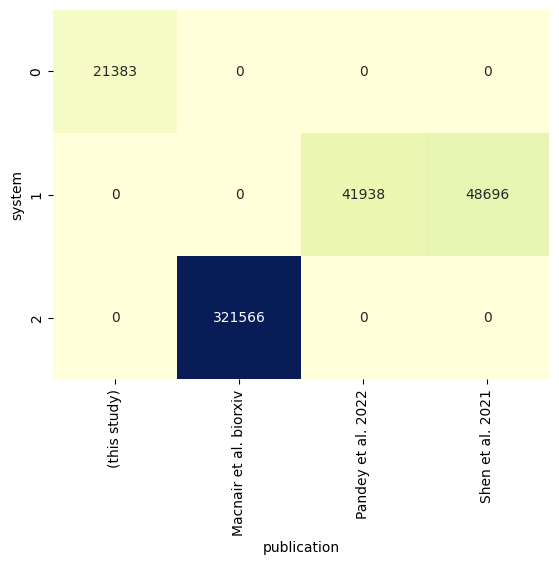

In [11]:
crosstab_df = pd.crosstab(adata.obs.system, adata.obs.publication)

# Create the heatmap with integer annotations
sns.heatmap(crosstab_df, cmap="YlGnBu", annot=True, fmt="d", cbar=False)

# Show the heatmap
plt.show()

In [12]:
adata.write_h5ad('./adata_all_mergedHVG_CAPS_updateSYS.h5ad')

In [13]:
n=33333
adata_sub=adata[np.random.RandomState(seed=0).permutation(adata.obs_names)[:n],:]
pd.crosstab(adata_sub.obs.cell_type_eval,adata_sub.obs.system)

system,0,1,2
cell_type_eval,,,
astrocytes,42,81,2975
b cells,0,0,81
choroid plexus,0,108,0
endo + peri,4,134,620
ependymal,4,8,0
excitatory neurons,154,6,1896
inhibitory neurons,68,0,561
microglia,447,3650,2897
mixed ol + microglia,15,87,0


In [14]:
adata_sub.write_h5ad('./adata_SUB33K_mergedHVG_CAPS_updateSYS.h5ad')

In [15]:
adata = adata_sub.copy()

# Run scVI model

In [16]:
scvi.model.SCVI.setup_anndata(adata, layer = "counts", batch_key="batch")

/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)
An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [17]:
model = scvi.model.SCVI(adata, n_layers=2, n_latent=30, gene_likelihood="nb")

In [18]:
model

SCVI model with the following parameters: 
n_hidden: 128, n_latent: 30, n_layers: 2, dropout_rate: 0.1, dispersion: gene, gene_likelihood: nb, 
latent_distribution: normal.
Training status: Not Trained
Model's adata is minified?: False

In [19]:
model.train(
    check_val_every_n_epoch=1,
    max_epochs=400,
    early_stopping=True,
    early_stopping_patience=20,
    early_stopping_monitor="elbo_validation",
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [3]
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Epoch 379/400:  95%|██████████▍| 379/400 [14:22<00:47,  2.28s/it, v_num=1, train_loss_step=1.29e+3, train_loss_epoch=1.24e+3]
Monitored metric elbo_validation did not improve in the last 20 records. Best score: 1267.317. Signaling Trainer to stop.


In [20]:
model.get_reconstruction_error(indices=model.validation_indices)

{'reconstruction_loss': -1252.2770248216227}

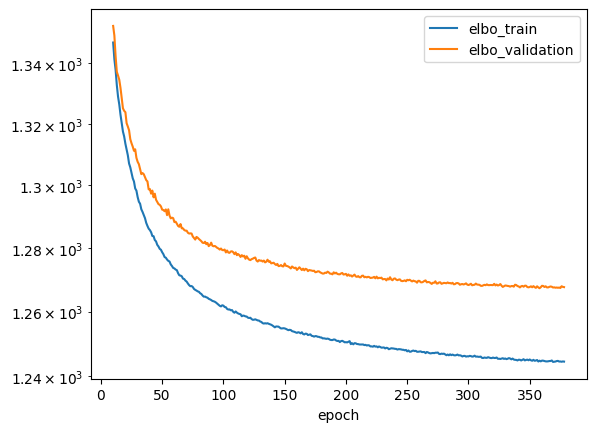

In [21]:
# Ensure convergence
train_test_results = model.history["elbo_train"]
train_test_results["elbo_validation"] = model.history["elbo_validation"]
train_test_results.iloc[10:].plot(logy=True)  # exclude first 10 epochs
plt.show()

In [22]:
SCVI_LATENT_KEY = "X_scVI"
adata.obsm[SCVI_LATENT_KEY] = model.get_latent_representation()

In [23]:
sc.pp.neighbors(adata, use_rep=SCVI_LATENT_KEY)
sc.tl.leiden(adata)

In [24]:
SCVI_MDE_KEY = "X_scVI_MDE"
adata.obsm[SCVI_MDE_KEY] = scvi.model.utils.mde(adata.obsm[SCVI_LATENT_KEY])

INFO     Using cuda:0 for `pymde.preserve_neighbors`.                                                              


/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seei

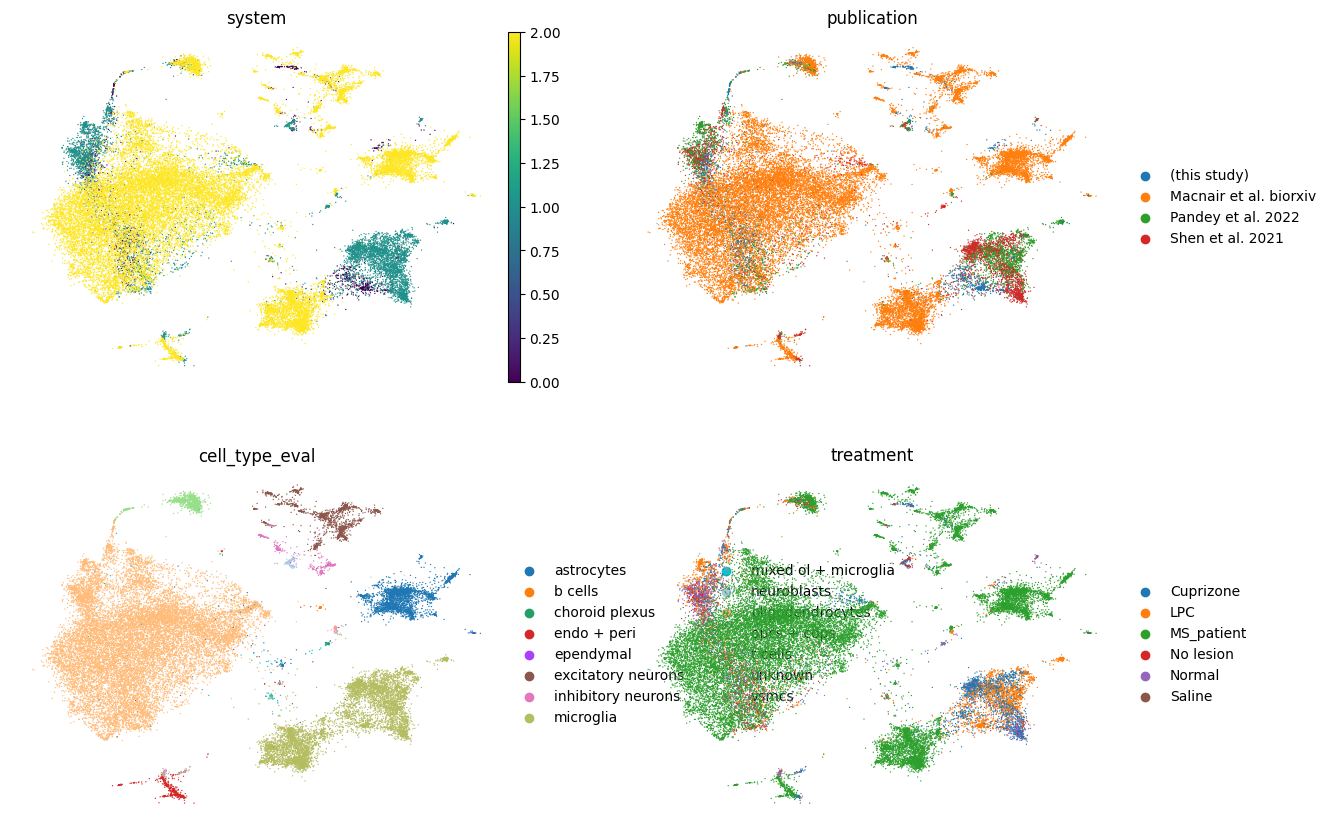

In [25]:
sc.pl.embedding(
    adata,
    basis=SCVI_MDE_KEY,
    color=["system", "publication", "cell_type_eval", "treatment"],
    frameon=False,
    ncols=1,
)

# Run scANVI model

In [26]:
scanvi_model = scvi.model.SCANVI.from_scvi_model(
    model,
    adata=adata,
    labels_key="cell_type_eval",
    unlabeled_category="unknown",
)

In [27]:
scanvi_model.train(max_epochs=20, n_samples_per_label=100)

INFO     Training for 20 epochs.                                                                                   


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [3]
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Epoch 20/20: 100%|███████████████| 20/20 [01:52<00:00,  5.63s/it, v_num=1, train_loss_step=1.19e+3, train_loss_epoch=1.22e+3]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 20/20: 100%|███████████████| 20/20 [01:52<00:00,  5.63s/it, v_num=1, train_loss_step=1.19e+3, train_loss_epoch=1.22e+3]


In [28]:
SCANVI_LATENT_KEY = "X_scANVI"
adata.obsm[SCANVI_LATENT_KEY] = scanvi_model.get_latent_representation(adata)

In [29]:
SCANVI_MDE_KEY = "X_scANVI_MDE"
adata.obsm[SCANVI_MDE_KEY] = scvi.model.utils.mde(adata.obsm[SCANVI_LATENT_KEY])

INFO     Using cuda:0 for `pymde.preserve_neighbors`.                                                              


/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seei

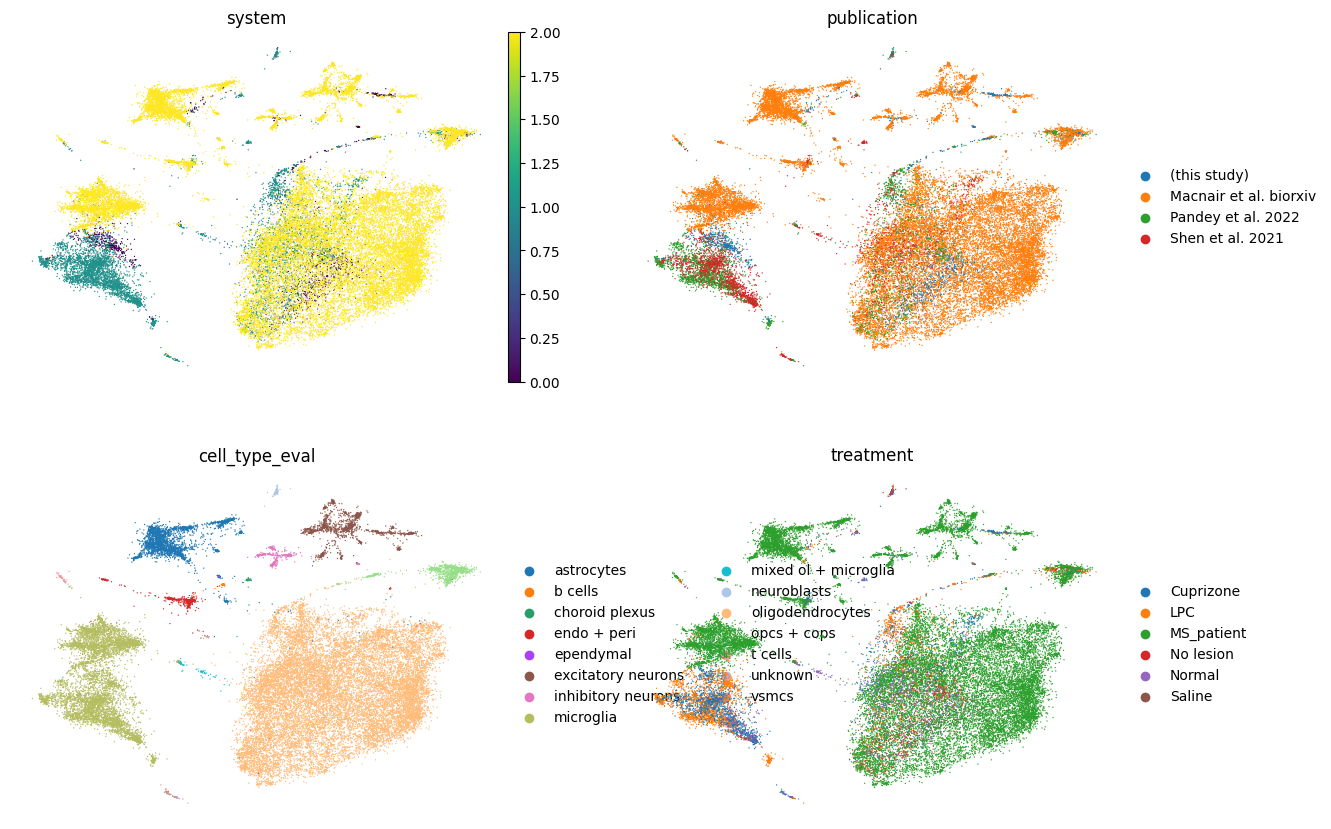

In [30]:
sc.pl.embedding(
    adata,
    basis=SCANVI_MDE_KEY,
    color=["system", "publication", "cell_type_eval", "treatment"],
    frameon=False,
    ncols=2,
)

/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seei

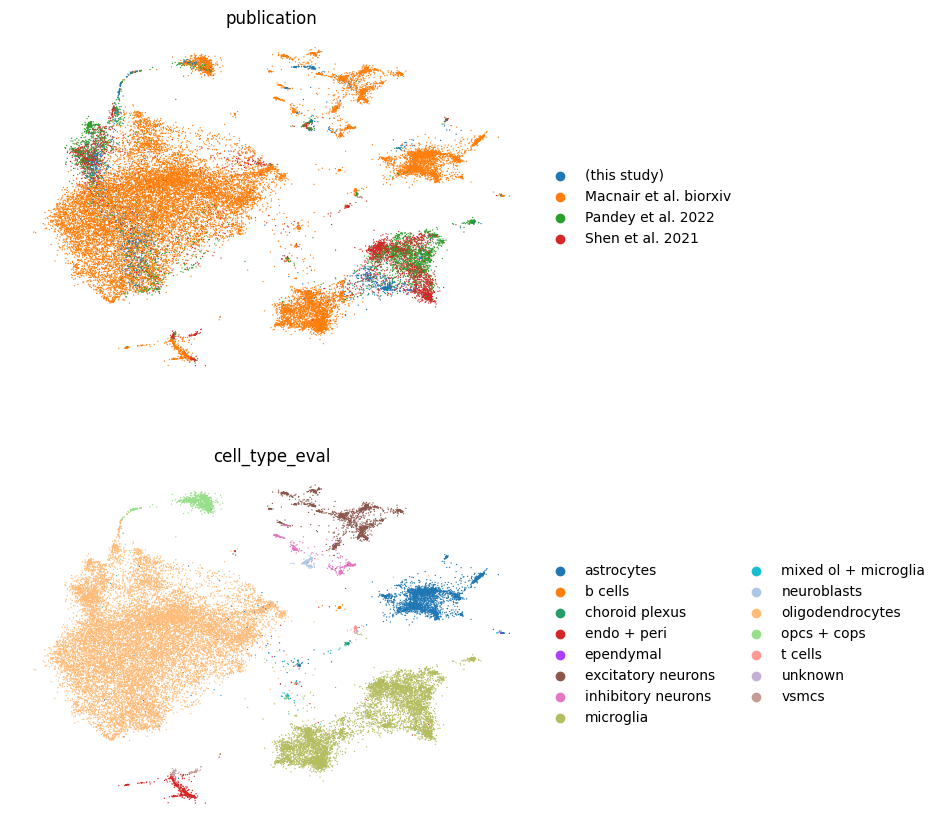

In [31]:
sc.pl.embedding(
    adata,
    basis=SCVI_MDE_KEY,
    color=["publication", "cell_type_eval"],
    frameon=False,
    ncols=1,
)

/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seei

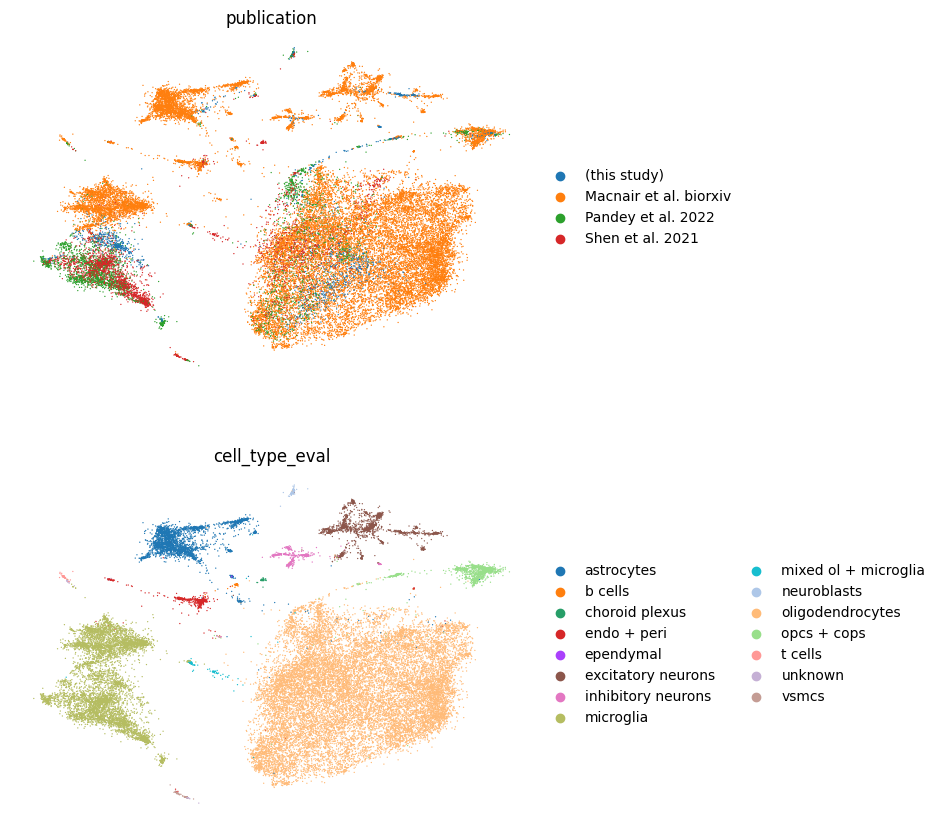

In [32]:
sc.pl.embedding(
    adata,
    basis=SCANVI_MDE_KEY,
    color=["publication", "cell_type_eval"],
    frameon=False,
    ncols=1,
)

# Benchmarking

In [33]:
import os
import tempfile

import scanpy as sc
import scvi
import torch
from rich import print
from scib_metrics.benchmark import Benchmarker

In [34]:
adata

AnnData object with n_obs × n_vars = 33333 × 2904
    obs: 'sample_id', 'publication', 'sample_id_anon', 'individual_id_anon', 'replicate', 'treatment', 'condition', 'tissue', 'time', 'batch', 'lesion_type', 'sample_source', 'diagnosis', 'n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo', 's_score', 'g2m_score', 'phase', 'type_fine', 'type_broad', 'cluster_zoom', 'exclude_pseudobulk', 'seq_pool', 'sex', 'age_at_death', 'smoker', 'cause_of_death', 'years_w_ms', 'pmi_minutes', 'age_scale', 'age_cat', 'pmi_cat', 'pmi_cat2', 'cell_cycle_diff', 'cell_type_eval', 'library_type', 'sample_type', 'organism', 'system', '_scvi_batch', '_scvi_labels', 'leiden'
    var: 'human_gene_id', 'mouse_gene_id', 'mouse_gene_name', 'human_gene_name'
    uns: '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'leiden', 'publication_colors', 'cell_type_eval_colors', 'treatment_colors'
    obsm: 'X_scVI', 'X_scVI_MDE', 'X_scANVI', 'X_scANVI_MDE'
    layers: 'counts', 'log1p_norm'
    obsp: 'd

In [35]:
bm = Benchmarker(
    adata,
    batch_key="batch",
    label_key="cell_type_eval",
    embedding_obsm_keys=[SCVI_LATENT_KEY, SCANVI_LATENT_KEY],
    n_jobs=-1,
)
bm.benchmark()

Metrics:  60%|███████████████████████████▌                  | 6/10 [00:29<00:18,  4.53s/it, Batch correction: kbet_per_label]/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/afs/crc.nd.edu/user/e/eaboelno/miniforge

/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  comp_size = pd.value_counts(labs)
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scib_metrics/_kbet.py:181: FutureWarning: pandas.value_counts is deprecated and will

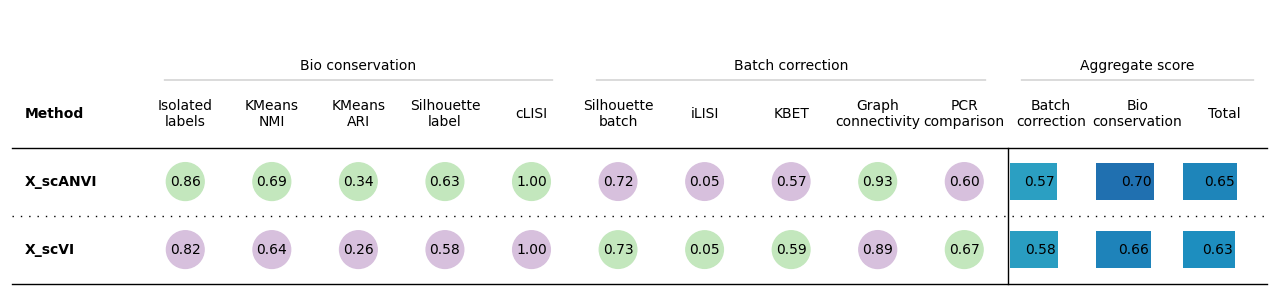

In [36]:
bm.plot_results_table(min_max_scale=False)

In [37]:
df = bm.get_results(min_max_scale=False)
print(df)

Isolated labels        KMeans NMI        KMeans ARI  \
Embedding                                                           
X_scVI               0.818437          0.640795          0.257961   
X_scANVI              0.86126          0.689412          0.341838   
Metric Type  Bio conservation  Bio conservation  Bio conservation   

             Silhouette label             cLISI  Silhouette batch  \
Embedding                                                           
X_scVI               0.582869               1.0          0.728894   
X_scANVI             0.632326               1.0          0.724766   
Metric Type  Bio conservation  Bio conservation  Batch correction   

                        iLISI              KBET Graph connectivity  \
Embedding                                                            
X_scVI                0.05043          0.585473           0.886039   
X_scANVI             0.048082          0.572436           0.928841   
Metric Type  Batch correction  Batch correction   Batch correction   

               PCR comparison Batch correction Bio conservation  \
Embedding                                                         
X_scVI               0.669682         0.584104         0.660012   
X_scANVI             0.600342         0.574893         0.704967   
Metric Type  Batch correction  Aggregate score  Aggregate score   

                       Total  
Embedding                     
X_scVI              0.629649  
X_scANVI            0.652938  
Metric Type  Aggregate score